In [11]:
import random,numpy as np,pylab as pl


In [12]:
# Problem Set 4: Simulating the Spread of Disease and Bacteria Population Dynamics
# Name:
# Collaborators (Discussion):
# Time:

import math
import numpy as np
import pylab 
import random

In [13]:
class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleBacteria
    and ResistantBacteria classes to indicate that a bacteria cell does not
    reproduce. You should use NoChildException as is; you do not need to
    modify it or add any code.
    """

assignment 

In [14]:
class SimpleBacteria(object):
    def __init__(self, birth_prob, death_prob):
        self.birth_prob = birth_prob
        self.death_prob = death_prob

    def is_killed(self):
        if random.random() <= self.death_prob : 
            return True
        else:
            return False


    def reproduce(self, pop_density):
        if random.random() <=  self.birth_prob * (1 - pop_density) : 
            return SimpleBacteria(self.birth_prob ,self.death_prob)
        else:
            raise NoChildException
    def __str__(self):
        return str(self.birth_prob) +' , ' +  str(self.death_prob)



In [15]:
class Patient(object):

    def __init__(self, bacteria, max_pop):
        self.bacteria_list = bacteria
        self.max_pop = max_pop


    def get_total_pop(self):
        return len(self.bacteria_list)


    def update(self):
        survivors = [ i for i in self.bacteria_list if not i.is_killed()]
        self.pop_density = len(survivors)/self.max_pop
        progeny = []
        for i in survivors:
            try :
                progeny.append(i.reproduce(self.pop_density))
            except NoChildException:
                continue 
        self.bacteria_list = survivors +  progeny
        return len(self.bacteria_list)

In [16]:
class Test(object):
    def __init__(self,name,birth_prob):
        self.name = name 
        self.birth_prob = birth_prob
    def test(self):
        if random.random()<=0.5:
            return True 
        else:
            return False
    def __str__(self):
        return str(self.name)
    def recreate(self,pop):
        if random.random() <= self.birth_prob * (1-pop):
            return Test(self.name,self.birth_prob)
        else:
            raise NoChildException

In [17]:
def calc_pop_avg(populations, n):
    return float(sum([i[n] for i in populations])/len(populations))

In [18]:
def make_one_curve_plot(x_coords, y_coords, x_label, y_label, title):
    pl.figure()
    pl.plot(x_coords, y_coords)
    pl.xlabel(x_label)
    pl.ylabel(y_label)
    pl.title(title)
    pl.show()

In [19]:
def simulation_without_antibiotic(num_bacteria,
                                  max_pop,
                                  birth_prob,
                                  death_prob,
                                  num_trials):
   
    bacterial_avg = []
    for i in  range(num_trials):
        bacteria = [SimpleBacteria(birth_prob,death_prob) for i in range(num_bacteria)]
        patient = Patient(bacteria,max_pop)
        bacterial_tag = [num_bacteria]
        for i in range(299):
            bacterial_tag.append(patient.update())
        bacterial_avg.append(bacterial_tag)
    x = range(300)
    y=[(calc_pop_avg(bacterial_avg,i)) for  i in x ]
    make_one_curve_plot(x,y,'Time Step','Average Population','Without Antibiotic')
    return bacterial_avg 
                    
    

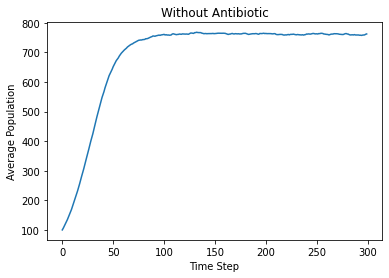

In [20]:
base = simulation_without_antibiotic(100, 1000, 0.1, 0.025, 50)

In [21]:

def std(x):
    res = 0 
    mean = sum(x)/len(x)
    for i in x:
        res += (mean - i)**2
    return (res/len(x))**0.5

In [22]:
def calc_pop_std(populations, t):
    x = [i[t] for i in populations]
    return float(std(x))

In [23]:
def calc_95_ci(populations, t):
    sample_mean = calc_pop_avg(populations, t)
    sample_std = calc_pop_std(populations, t)
    SEM = sample_std/len(populations)
    return (sample_mean-1.96 * SEM, sample_mean+1.96 * SEM) 
    


In [24]:
class ResistantBacteria(SimpleBacteria):
    """A bacteria cell that can have antibiotic resistance."""

    def __init__(self, birth_prob, death_prob, resistant, mut_prob):
        SimpleBacteria.__init__(self,birth_prob,death_prob)
        self.resistant  = resistant 
        self.mut_prob = mut_prob
        
        """
        Args:
            birth_prob (float in [0, 1]): reproduction probability
            death_prob (float in [0, 1]): death probability
            resistant (bool): whether this bacteria has antibiotic resistance
            mut_prob (float): mutation probability for this
                bacteria cell. This is the maximum probability of the
                offspring acquiring antibiotic resistance
        """
    def __str__(self):
        return str(self.birth_prob) + ' , ' + str(self.death_prob) + ' , ' + str(self.resistant) + '  , ' +  str(self.mut_prob)
    def get_resistant(self):
        return self.resistant
    def is_killed(self):
        if self.resistant:
            if random.random() <= self.death_prob:
                return True 
            else:
                return False
        elif random.random() <= self.death_prob/4:
                return True 
        else:
            return False
        
        """Stochastically determines whether this bacteria cell is killed in
        the patient's body at a given time step.

        Checks whether the bacteria has antibiotic resistance. If resistant,
        the bacteria dies with the regular death probability. If not resistant,
        the bacteria dies with the regular death probability / 4.

        Returns:
            bool: True if the bacteria dies with the appropriate probability
                and False otherwise.
        """
  

    def reproduce(self, pop_density):
        if  random.random()<=self.birth_prob * (1 - pop_density):
            if self.get_resistant():
                return ResistantBacteria(self.birth_prob,self.death_prob,self.resistant,self.mut_prob)
            else:
                resistant = random.random()<=self.mut_prob * (1-pop_density) 
                return ResistantBacteria(self.birth_prob,self.death_prob,resistant,self.mut_prob)
        else:
            raise NoChildException

                    
            
        """
        Stochastically determines whether this bacteria cell reproduces at a
        time step. Called by the update() method in the TreatedPatient class.

        A surviving bacteria cell will reproduce with probability:
        self.birth_prob * (1 - pop_density).

        If the bacteria cell reproduces, then reproduce() creates and returns
        an instance of the offspring ResistantBacteria, which will have the
        same birth_prob, death_prob, and mut_prob values as its parent.

        If the bacteria has antibiotic resistance, the offspring will also be
        resistant. If the bacteria does not have antibiotic resistance, its
        offspring have a probability of self.mut_prob * (1-pop_density) of
        developing that resistance trait. That is, bacteria in less densely
        populated environments have a greater chance of mutating to have
        antibiotic resistance.

        Args:
            pop_density (float): the population density

        Returns:
            ResistantBacteria: an instance representing the offspring of
            this bacteria cell (if the bacteria reproduces). The child should
            have the same birth_prob, death_prob values and mut_prob
            as this bacteria. Otherwise, raises a NoChildException if this
            bacteria cell does not reproduce.
             """

In [25]:
class TreatedPatient(Patient):
    """
    Representation of a treated patient. The patient is able to take an
    antibiotic and his/her bacteria population can acquire antibiotic
    resistance. The patient cannot go off an antibiotic once on it.
    """
    def __init__(self, bacteria, max_pop):
        Patient.__init__(self,bacteria,max_pop)
        self.on_antibiotic=False
        """
        Args:
            bacteria: The list representing the bacteria population (a list of
                      bacteria instances)
            max_pop: The maximum bacteria population for this patient (int)

        This function should initialize self.on_antibiotic, which represents
        whether a patient has been given an antibiotic. Initially, the
        patient has not been given an antibiotic.

        Don't forget to call Patient's __init__ method at the start of this
        method.
        """

    def set_on_antibiotic(self):
        self.on_antibiotic = True 
        """
        Administer an antibiotic to this patient. The antibiotic acts on the
        bacteria population for all subsequent time steps.
        """


    def get_resist_pop(self):
        return sum ([1 for i in self.bacteria_list if i.get_resistant()])
        
        """
        Get the population size of bacteria cells with antibiotic resistance

        Returns:
            int: the number of bacteria with antibiotic resistance
        """


    def update(self):
        survivors = [i for i in self.bacteria_list if not i.is_killed()]
        if self.on_antibiotic:
            survivors = [  i for i in survivors if i.resistant]
        self.pop_density = len(survivors)/self.max_pop
        progeny = []
        for i in survivors:
            try :
                progeny.append(i.reproduce(self.pop_density))
            except NoChildException:
                continue 
        self.bacteria_list = survivors +  progeny
        return  len(self.bacteria_list)
        """
        Update the state of the bacteria population in this patient for a
        single time step. update() should execute these actions in order:

        1. Determine whether each bacteria cell dies (according to the
           is_killed method) and create a new list of surviving bacteria cells.

        2. If the patient is on antibiotics, the surviving bacteria cells from
           (1) only survive further if they are resistant. If the patient is
           not on the antibiotic, keep all surviving bacteria cells from (1)

        3. Calculate the current population density. This value is used until
           the next call to update(). Use the same calculation as in Patient

        4. Based on this value of population density, determine whether each
           surviving bacteria cell should reproduce and add offspring bacteria
           cells to the list of bacteria in this patient.

        5. Reassign the patient's bacteria list to be the list of survived
           bacteria and new offspring bacteria

        Returns:
            int: The total bacteria population at the end of the update
        """



In [26]:
def simulation_with_antibiotic(num_bacteria,
                               max_pop,
                               birth_prob,
                               death_prob,
                               resistant,
                               mut_prob,
                               num_trials):
    bacterial_array = []
    resistant_array = []
    for  i in range(num_trials):
        bacteria =[ResistantBacteria(birth_prob,death_prob,resistant,mut_prob) for i in range(num_bacteria)]
        patient = TreatedPatient(bacteria,max_pop)
        bacterial_count = [num_bacteria]
        resistant_count = [patient.get_resist_pop()]
        for i in range(149):
            bacterial_count.append(patient.update())
            resistant_count.append(patient.get_resist_pop())
        patient.set_on_antibiotic()
        for i in range(250):
            bacterial_count.append(patient.update())
            resistant_count.append(patient.get_resist_pop())
        bacterial_array.append(bacterial_count)
        resistant_array.append(resistant_count)
    x = range(400)
    y = [calc_pop_avg(bacterial_array,i) for i in x]
    r = [calc_pop_avg(resistant_array,i) for i in x]
    pylab.figure()
    pylab.plot(x, y , label = 'Total')
    pylab.plot(x,r,label ='resistant bacteria')
    pylab.xlabel('Time Step')
    pylab.ylabel('Average Population')
    pylab.title('with antibiotic at 150 ts ')
    pylab.legend()
    return bacterial_array,resistant_array
        
    """
    Runs simulations and plots graphs for problem 4.

    For each of num_trials trials:
        * instantiate a list of ResistantBacteria
        * instantiate a patient
        * run a simulation for 150 timesteps, add the antibiotic, and run the
          simulation for an additional 250 timesteps, recording the total
          bacteria population and the resistance bacteria population after
          each time step

    Plot the average bacteria population size for both the total bacteria
    population and the antibiotic-resistant bacteria population (y-axis) as a
    function of elapsed time steps (x-axis) on the same plot. You might find
    the helper function make_two_curve_plot helpful

    Args:
        num_bacteria (int): number of ResistantBacteria to create for
            the patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float int [0-1]): reproduction probability
        death_prob (float in [0, 1]): probability of a bacteria cell dying
        resistant (bool): whether the bacteria initially have
            antibiotic resistance
        mut_prob (float in [0, 1]): mutation probability for the
            ResistantBacteria cells
        num_trials (int): number of simulation runs to execute

    Returns: a tuple of two lists of lists, or two 2D arrays
        populations (list of lists or 2D array): the total number of bacteria
            at each time step for each trial; total_population[i][j] is the
            total population for trial i at time step j
        resistant_pop (list of lists or 2D array): the total number of
            resistant bacteria at each time step for each trial;
            resistant_pop[i][j] is the number of resistant bacteria for
            trial i at time step j
    """


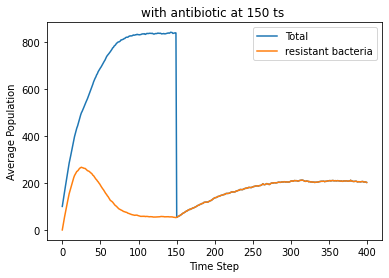

In [27]:
random.seed(40)
total_pop, resistant_pop = simulation_with_antibiotic(num_bacteria=100,
                                                      max_pop=1000,
                                                      birth_prob=0.3,
                                                      death_prob=0.2,
                                                      resistant=False,
                                                      mut_prob=0.8,
                                                      num_trials=50)

In [28]:
calc_95_ci(total_pop, 299),calc_95_ci(resistant_pop, 299)






((205.5384938461559, 207.82150615384413),
 (205.5384938461559, 207.82150615384413))

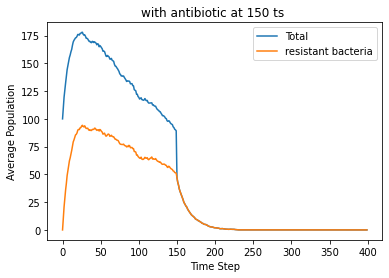

In [29]:
random.seed(40)
total_pop, resistant_pop = simulation_with_antibiotic(num_bacteria=100,
                                                      max_pop=1000,
                                                      birth_prob=0.17,
                                                      death_prob=0.2,
                                                      resistant=False,
                                                      mut_prob=0.8,
                                                      num_trials=50)

In [30]:
calc_95_ci(total_pop, 299),calc_95_ci(resistant_pop, 299)






((0.0, 0.0), (0.0, 0.0))